**Question 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = data[:, index]

  return result

def prepare_data(file_path):
  data = np.genfromtxt(file_path, delimiter = ',', skip_header=True)
  N= len(data)

  tv_data = get_column(data, 0)

  radio_data = get_column(data, 1)

  newspaper_data = get_column(data, 2)

  sales_data = get_column(data, 3)

  X = [tv_data, radio_data, newspaper_data]
  y = sales_data

  return X, y


X, y = prepare_data('/content/sample_data/advertising.csv')
list = [ sum(X[0][:5]) , sum (X[1][:5]) , sum(X[2][:5]) , sum(y[:5])]
print (list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [ ]:
def initialize_params():
  w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)

  return w1, w2, w3, b

'''
w1 = random.gauss(mu = 0.0, sigma =0.01)
'''
def predict(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss(y_hat, y):
  return (y_hat - y)**2

def compute_loss_mae(y_hat, y):
  return np.abs(y_hat - y)

def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2 * xi * (y_hat - y)

  return dl_dwi

def compute_gradient_b(y, y_hat):
  return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
  return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
  return b - lr * dl_db

**Question 2**

In [ ]:
y = predict(x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print(y)

1.0


**Question 3**

In [ ]:
l = compute_lost(y_hat =1 , y =0.5)
print(l)

## =>>> A

NameError: name 'compute_lost' is not defined

**Question 4**

In [ ]:
g_wi = compute_gradient_wi(xi =1.0 , y =1.0 , y_hat =0.5)
print(g_wi)

# =>>> A

**Question 5**

In [ ]:
g_b = compute_gradient_b(y =2.0 , y_hat =0.5)
print(g_b)

## =>>> B

**Question 6**

In [ ]:
after_wi = update_weight_wi(wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print(after_wi)

# =>>> A

**Question 7**

In [ ]:
after_b = update_weight_b(b =0.5 , dl_db = -1.0 , lr = 1e-5)
print(after_b)

## ===> A

In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  losses = []

  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y_hat, y)


      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)

      dl_db = compute_gradient_b(y, y_hat)

      #Update
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)

      b = update_weight_b(b, dl_db, lr)

      losses.append(loss)

  return (w1, w2, w3, b, losses)

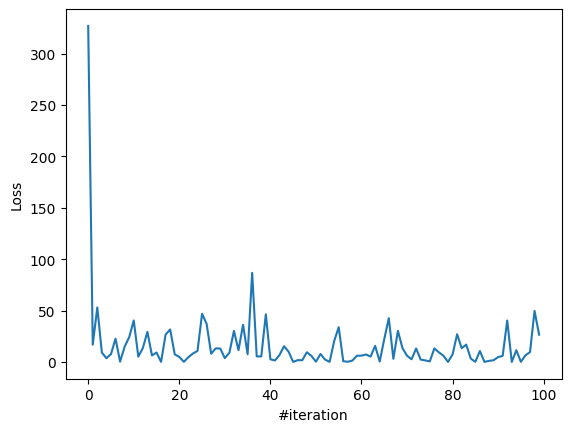

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

**Question 8**

In [ ]:
X, y = prepare_data('/content/sample_data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

# =>> A

0.07405984066396477 0.15917360263437663 0.017561197559948935


**Question 9**

In [ ]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X , y = prepare_data('/content/sample_data/advertising.csv')
(w1 , w2 , w3 ,b , losses) = implement_linear_regression(X , y , epoch_max =50 , lr =1e-5)
sales = predict( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is {sales }')

# ====> B

predicted sales is 8.176413319549823


**Question 10**

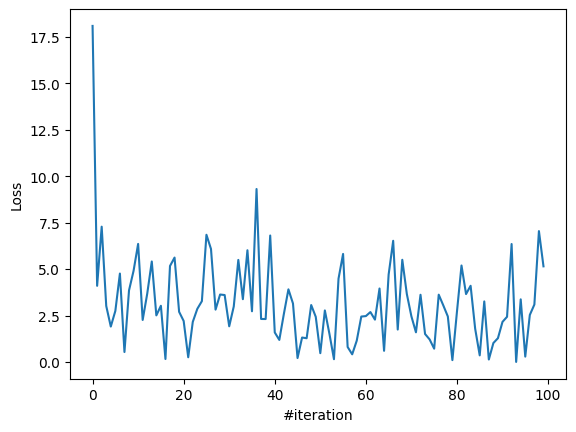

0.5


In [ ]:
def implement_linear_regression_mae(X_data, y_data, epoch_max = 50, lr = 1e-5):
  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  losses = []

  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss_mae(y_hat, y)


      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)

      dl_db = compute_gradient_b(y, y_hat)

      #Update
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)

      b = update_weight_b(b, dl_db, lr)

      losses.append(loss)

  return (w1, w2, w3, b, losses)


(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

l = compute_loss_mae(y_hat =1 , y =0.5)
print(l)

# ===> A

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max =50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          y_hat = predict(x1, x2, x3, w1, w2, w3, b)


          loss = compute_loss(y_hat, y)

          # accumulate loss to total loss
          loss_total += loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # accumulate gradient w1, w2, w3, b
          dw1_total += dl_dw1
          dw2_total += dl_dw2
          dw3_total += dl_dw3
          db_total += dl_db

      # (after processing N samples) - update parameters
      #your code here *****************************
      w1 = update_weight_wi(w1, dw1_total / N, lr)
      w2 = update_weight_wi(w2, dw2_total / N, lr)
      w3 = update_weight_wi(w3, dw3_total / N, lr)

      b = update_weight_b(b, db_total / N, lr)

      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

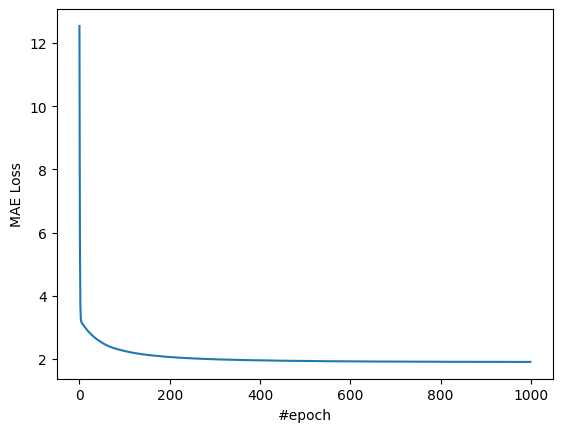

In [ ]:
X,y = prepare_data('/content/sample_data/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

**Question 11**


In [ ]:
X,y = prepare_data('/content/sample_data/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


### **Exercise 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def get_column(data, index):
  result = data[:, index]

  return result

def prepare_data(path):
  data = np.genfromtxt(path, delimiter= ',', skip_header = True)

  tv_data = get_column(data, 0)

  radio_data = get_column(data, 1)

  newspaper_data = get_column(data, 2)

  sales_data = get_column(data, 3)

  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  Y = sales_data

  return X, y

In [ ]:
def initialize_params():
  return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [ ]:
def predict(X_features, weights):
  result = sum([x * w for x, w in zip(X_features, weights)])

  return result

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
  dl_dweights = [2 * (y_hat - y) * x for x in X_features]

  return dl_dweights

def update_weight(weights, dl_dweights, lr):
  weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]

  return weights

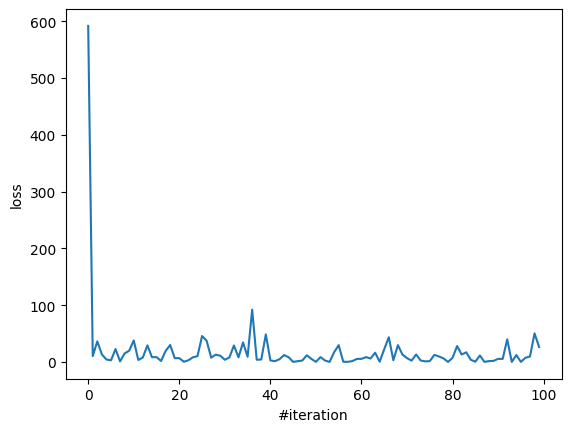

In [ ]:
def implement_linear_regression(X_features, y_output, epoch_max = 50, lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_output)
  for epoch in range(epoch_max):
    for i in range(N):
      features_i = X_features[i]
      y = y_output[i]

      y_hat = predict(features_i, weights)

      loss = compute_loss(y_hat, y)

      dl_dweights = compute_gradient_w(features_i, y, y_hat)

      weights = update_weight(weights, dl_dweights, lr)

      losses.append(loss)
  return weights, losses

X, y = prepare_data('/content/sample_data/advertising.csv')
W,L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel('#iteration')
plt.ylabel("loss")
plt.show()

**Question 12**

In [ ]:
X, y = prepare_data('/content/sample_data/advertising.csv')
W,L = implement_linear_regression(X, y)
print(L[9999])

# ====> A

31.339223408109948
